In [207]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [208]:
#Initializing charactaristic variables
alpha = 1.6 * pow(10, -5) #Thermal diffusivity of chrome steel in m^2/s
k = 61  #Thermal conductivity of chrome steel in W/m.K
h = 400  #Convection heat transfer coefficient in W/m^2.K
l = 0.08  #Dimensions of the square block in m

In [209]:
#Temperature conditions
T0 = 100+273 #Initial temperature of the block in K
Tinf = 25+273 #Surrounding temperature due to cool stream in K

In [210]:
#Discretization variables
ngrid = 11 #number of nodes in the first quadrant grid
dt = 1 #forward time difference in s
t = 60 #total time after which we want to find the temperature distribution
nt = 60  #total number of time steps taken
dx = (l/2)/ngrid  #forward space difference in first quadrant
dy = dx #forward space difference in y direction

In [211]:
 # a matrix for storing obtained T values after each time step
Tn = np.zeros([ngrid, ngrid])
Tn[:,:] = T0 #Initial T matrix
Tn_half = np.zeros([ngrid, ngrid]) #n+1/2 level matrix
Tn_1 = np.zeros([ngrid, ngrid]) #n+1 level matrix
rx = alpha*dt/(2*(dx**2)) #Here rx = ry because of symmetricity

In [212]:
#in x direction
coeff = np.zeros([ngrid, ngrid]) #coefficient matrix
const = np.zeros([ngrid]) #constant matrix

In [213]:
#using the 2 boundary condition for the formulation of the matrix
coeff[0,0] = -1
coeff[0,1] = 1
coeff[-1, -2] = -k/dx
coeff[-1, -1] = k/dx + h

In [214]:
for i in range(1, ngrid-1):
    coeff[i,i-1] = -rx/2
    coeff[i,i] = 1 + rx
    coeff[i,i+1] = -rx/2

In [215]:
#Boundary condition on the constant array
const[0] = 0
const[-1] = h * Tinf

In [216]:
for t in range(6):
    for j in range(1, ngrid-1):
        const[1: -2] = (rx/2) * Tn[1:-2, j-1] + (1 - rx) * Tn[1:-2, j] + (rx/2) * Tn[1:-2, j+1]
        Tn_half[:,j] = np.linalg.solve(coeff, const)
        const[1: -2] = 0
    Tn_half[:, -1] = (h * Tinf + Tn_half[:, -2] * (k / dx )) / (k / dx + h)
    Tn_half[:, 0] = Tn_half[:, 1]  

    #STEP 2
    for i in range(1, ngrid-1):
        const[1: -2] = (rx/2) * Tn_half[i-1, 1:-2] + (1 - rx) * Tn_half[i, 1:-2] + (rx/2) * Tn_half[i+1, 1:-2]
        Tn_1[i, :] = np.linalg.solve(coeff, const)
        const[1: -2] = 0
    Tn_1[0, :] = Tn_1[1, :]
    Tn_1[-1, :] = (h * Tinf + Tn_1[-2, :] * (k / dx)) / (k / dx + h)
    Tn = np.copy(Tn_1)
    Tn_half[:,:] = 0
    Tn_1[:,:] = 0
print(Tn)

[[369.92101641 369.92101641 368.37147654 363.95163641 353.58002601
  332.00309111 292.38900846 228.84746323 140.42092177  34.03989286
   40.18743538]
 [369.92101641 369.92101641 368.37147654 363.95163641 353.58002601
  332.00309111 292.38900846 228.84746323 140.42092177  34.03989286
   40.18743538]
 [367.96945964 367.96945964 366.42814086 362.03175021 351.71516644
  330.25270805 290.84879808 227.64437278 139.68697869  33.87035477
   40.02184578]
 [362.61064607 362.61064607 361.09190172 356.7599014  346.59441619
  325.44630085 286.61950768 224.34078584 137.67163167  33.40481718
   39.56715041]
 [350.63457434 350.63457434 349.16628016 344.9781817  335.15037704
  314.704767   277.16773548 216.95780943 133.16766076  32.36441684
   38.55098064]
 [326.96084534 326.96084534 325.59227865 321.68863855 312.52834474
  293.47141377 258.48392172 202.36349282 124.26442527  30.30780291
   36.54226456]
 [285.51212412 285.51212412 284.31816351 280.91256219 272.92096771
  256.29538042 225.77170355 176.8

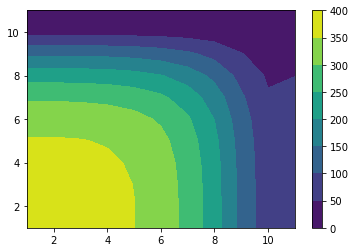

In [217]:
x = np.linspace(1, ngrid, ngrid)
y = np.linspace(1, ngrid, ngrid)
plt.contourf(x, y, np.transpose(Tn))
plt.colorbar()
plt.savefig("Tn_@_t=60")